This task is to calculate the Principal Components.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [4]:
#training set 1
train_1_df  = pd.read_csv('C:\\Users\\Aishwarya\\notebooks\\CDA\\assignment 2\\BATADAL_dataset03.csv', parse_dates=True, index_col='DATETIME')

In [5]:
del train_1_df['ATT_FLAG']
train_1_df

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-06-01 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
2014-06-01 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2014-06-01 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
2014-06-01 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
2014-06-01 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263
2014-06-01 05:00:00,0.791114,2.773177,5.155802,3.937262,3.191528,5.322743,3.988906,94.135468,1,94.153748,...,31.443146,76.848953,31.443146,67.832695,30.366247,64.369881,30.366247,60.329407,33.749393,32.849392
2014-06-01 06:00:00,1.186589,3.536068,4.983953,3.018011,2.859591,5.066728,2.977463,95.258003,1,95.276611,...,29.259064,75.703812,29.219223,87.435600,30.004425,63.333805,30.004425,58.606335,31.808870,30.908869
2014-06-01 07:00:00,1.420449,3.872926,4.747458,3.581882,2.359944,5.152646,2.953742,96.947456,1,96.966560,...,29.200378,73.617569,29.160114,86.829086,26.536455,62.231846,26.414701,68.808609,31.700340,30.800341
2014-06-01 08:00:00,1.534827,4.138434,4.417932,3.959265,1.748313,5.395835,3.228596,96.970291,1,96.989403,...,29.458397,74.182251,29.420120,89.644714,26.605623,60.656143,26.484545,69.221718,31.939442,31.039440


In [6]:
scaler = StandardScaler()
normalized_training = scaler.fit_transform(train_1_df)
print (normalized_training)
print (normalized_training.shape)

[[-1.80166786 -0.84216105 -1.4897346  ... -0.14960353 -1.03212449
  -0.36335486]
 [-1.88243244 -0.8693521  -0.82434137 ... -0.13962538 -1.03997205
  -0.37585097]
 [-1.95930569 -0.88499958 -0.09084088 ...  0.84640594 -1.03990535
  -0.37574476]
 ...
 [ 0.36394528  0.45105891 -1.58995051 ... -0.2674142  -0.58470987
   0.34908874]
 [ 0.21173951  0.41325741 -0.97116869 ... -0.20251108 -0.60133195
   0.32262046]
 [ 0.05827056  0.36958123 -0.32060645 ...  0.12189842 -0.60166048
   0.32209734]]
(8761, 43)


In [7]:

#randomly chose 20 components and then see further

pca = decomposition.PCA(n_components=20)
pca.fit(normalized_training)
pca_model = pca.transform(normalized_training)

In [8]:
pca.explained_variance_ratio_.cumsum()

array([0.21494218, 0.34874316, 0.47677729, 0.57654339, 0.64867854,
       0.71628148, 0.77181216, 0.82719161, 0.8697186 , 0.90220261,
       0.9278643 , 0.95244475, 0.97108338, 0.98616798, 0.99348279,
       0.99639277, 0.99748605, 0.99827377, 0.99893749, 0.99934407])

In [9]:

train_2_df = pd.read_csv("C:\\Users\\Aishwarya\\notebooks\\CDA\\assignment 2\\BATADAL_test_dataset.csv", parse_dates=True, dayfirst=True, index_col='DATETIME')

In [14]:
#labels =  attack_csv['ATT_FLAG']
#normalizing
normalized_test  = scaler.fit_transform(train_2_df)
pca_test = pca.transform(normalized_test)
train_2_df

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
DATETIME,,,,,,,,,,,,,,,,,,,,,
2017-01-04 00:00:00,0.73,2.27,4.00,3.26,3.87,5.50,4.28,98.93,1,98.95,...,26.68,90.54,26.74,84.52,19.43,83.27,19.33,71.33,29.61,28.71
2017-01-04 01:00:00,0.69,2.25,4.53,3.26,3.84,5.50,4.78,97.95,1,97.97,...,26.67,90.43,26.73,85.04,25.97,64.22,25.86,73.79,29.63,28.73
2017-01-04 02:00:00,0.90,2.31,5.03,3.41,3.32,5.16,3.22,96.82,1,96.84,...,26.83,91.72,26.89,87.16,29.18,63.81,29.18,59.05,29.80,28.90
2017-01-04 03:00:00,1.11,2.54,5.16,3.97,2.82,5.01,2.54,96.76,1,96.78,...,28.27,76.12,28.23,88.83,26.53,63.42,26.41,70.92,30.80,29.90
2017-01-04 04:00:00,1.27,2.99,4.94,4.27,2.35,5.38,3.41,94.77,1,94.79,...,31.32,75.68,31.32,69.55,27.46,63.43,27.34,70.88,33.61,32.71
2017-01-04 05:00:00,1.54,3.72,4.71,3.53,1.99,5.50,4.32,94.58,1,94.60,...,31.82,75.27,31.82,67.54,27.96,62.65,27.86,78.00,34.10,33.20
2017-01-04 06:00:00,1.85,4.36,4.46,3.01,1.53,5.39,4.44,94.94,1,94.96,...,29.92,75.46,29.88,86.59,30.49,62.26,30.49,58.83,32.47,31.57
2017-01-04 07:00:00,2.00,4.64,4.24,3.39,2.19,5.05,2.92,95.58,1,95.60,...,29.98,71.26,29.94,86.28,26.75,85.11,26.75,57.57,32.49,31.59
2017-01-04 08:00:00,2.06,4.89,3.84,3.65,2.75,5.14,2.81,96.52,1,96.54,...,30.05,69.82,30.01,86.48,20.41,82.40,20.29,66.52,32.53,31.63


In [15]:
pca = decomposition.PCA()
pca.fit(normalized_training)
pca_model = pca.transform(normalized_training)

In [17]:
#variance values
print(np.sort(pca.explained_variance_)[::-1])
print (np.sort(pca.explained_variance_ratio_)[::-1])

[7.73880163e+00 4.81738519e+00 4.60975503e+00 3.59198956e+00
 2.59716191e+00 2.43398357e+00 1.99933262e+00 1.99388799e+00
 1.53114630e+00 1.16955790e+00 9.23926257e-01 8.84997095e-01
 6.71067185e-01 5.43107776e-01 2.63363186e-01 1.04771232e-01
 3.93624696e-02 2.83612156e-02 2.38967620e-02 1.46386292e-02
 9.12329242e-03 7.42142144e-03 2.42577247e-03 1.91759825e-03
 1.01347477e-03 5.44403134e-04 3.05990281e-04 2.96699289e-04
 1.98771459e-04 1.95000329e-04 1.12080398e-04 6.04850875e-05
 1.04826089e-06 2.35440453e-08 8.64833616e-10 2.50102493e-10
 3.58627499e-32 3.58627499e-32 3.58627499e-32 3.58627499e-32
 3.58627499e-32 3.58627499e-32 3.58627499e-32]
[2.14942175e-01 1.33800981e-01 1.28034135e-01 9.97660991e-02
 7.21351518e-02 6.76029376e-02 5.55306781e-02 5.53794557e-02
 4.25269870e-02 3.24840113e-02 2.56616888e-02 2.45804466e-02
 1.86386274e-02 1.50846051e-02 7.31480905e-03 2.90997980e-03
 1.09327713e-03 7.87721623e-04 6.63723176e-04 4.06582176e-04
 2.53395863e-04 2.06127065e-04 6.73748

In [18]:
pca.explained_variance_ratio_.cumsum()

array([0.21494218, 0.34874316, 0.47677729, 0.57654339, 0.64867854,
       0.71628148, 0.77181216, 0.82719161, 0.8697186 , 0.90220261,
       0.9278643 , 0.95244475, 0.97108338, 0.98616798, 0.99348279,
       0.99639277, 0.99748605, 0.99827377, 0.99893749, 0.99934407,
       0.99959747, 0.9998036 , 0.99987097, 0.99992423, 0.99995238,
       0.9999675 , 0.999976  , 0.99998424, 0.99998976, 0.99999518,
       0.99999829, 0.99999997, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

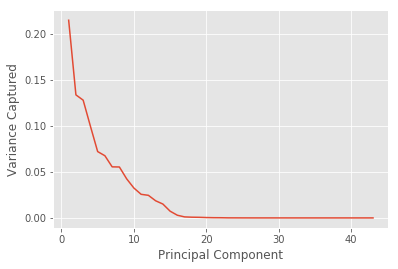

In [19]:
x_axis = np.arange(1, 44, 1)# take any value and you get an error which tells you the actual value of x, trial and error
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured')
plt.plot(x_axis, pca.explained_variance_ratio_)

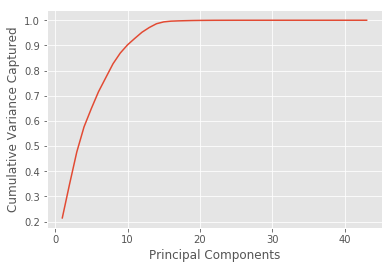

In [20]:
plt.xlabel('Principal Components')

plt.ylabel('Cumulative Variance Captured')
plt.plot(x_axis, pca.explained_variance_ratio_.cumsum())
#first 10 components explain 90% variance

Now we plot different PCS 

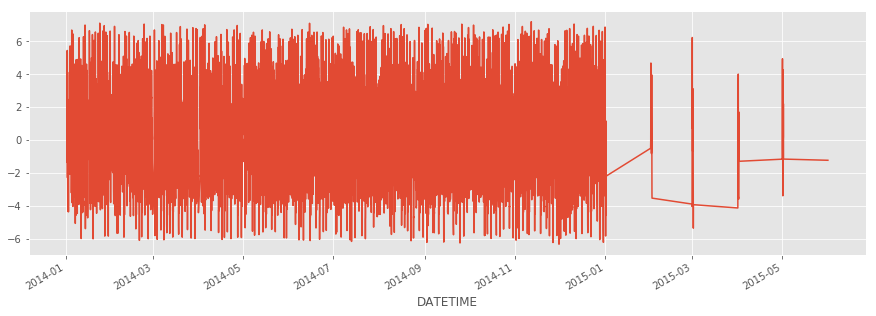

In [23]:
train_1_df = train_1_df.assign(PC1=pca_model[:,0])
train_1_df['PC1'].plot(figsize=(15,5))

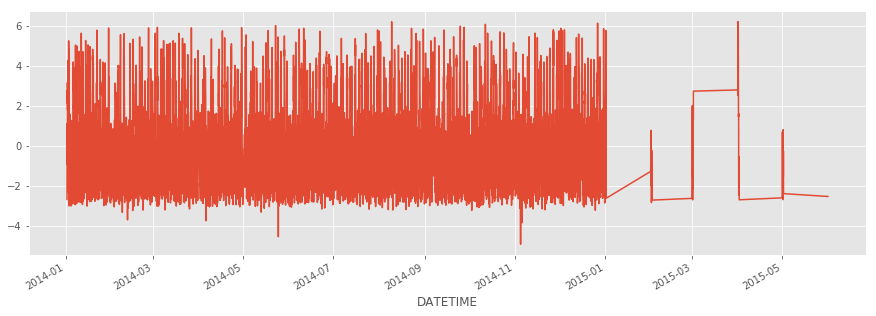

In [24]:
train_1_df = train_1_df.assign(PC2=pca_model[:,1])
train_1_df['PC2'].plot(figsize=(15,5))

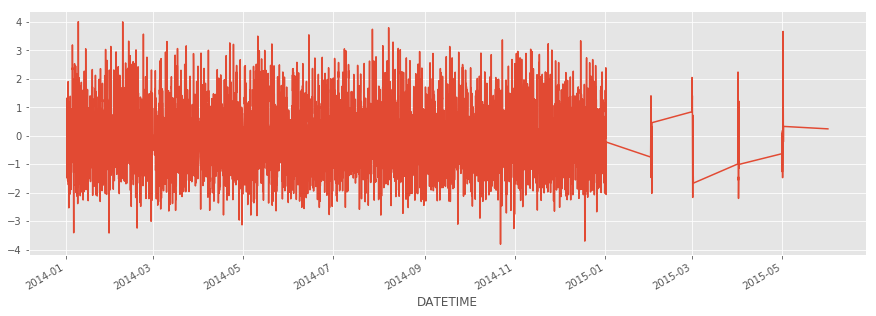

In [27]:
train_1_df =train_1_df.assign(PC10=pca_model[:,9])
train_1_df['PC10'].plot(figsize=(15,5))

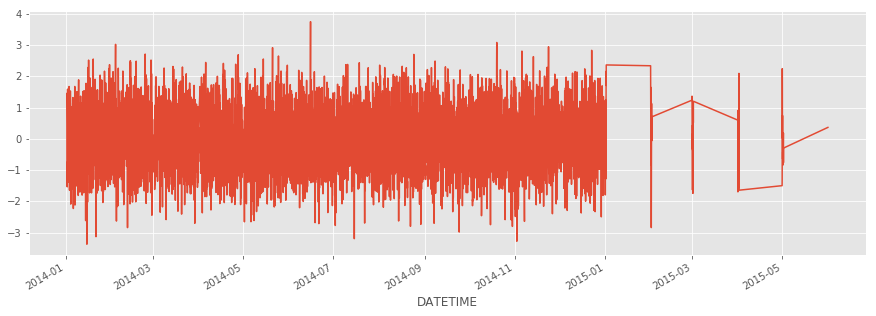

In [28]:
train_1_df = train_1_df.assign(PC12=pca_model[:,11])
train_1_df['PC12'].plot(figsize=(15,5))

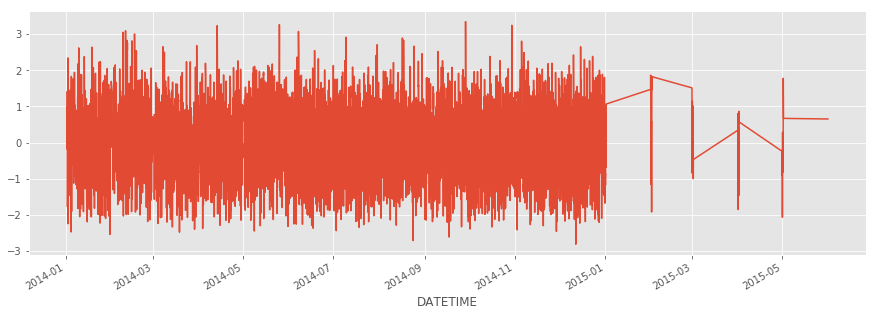

In [30]:
train_1_df = train_1_df.assign(PC11=pca_model[:,10])
train_1_df['PC11'].plot(figsize=(15,5))

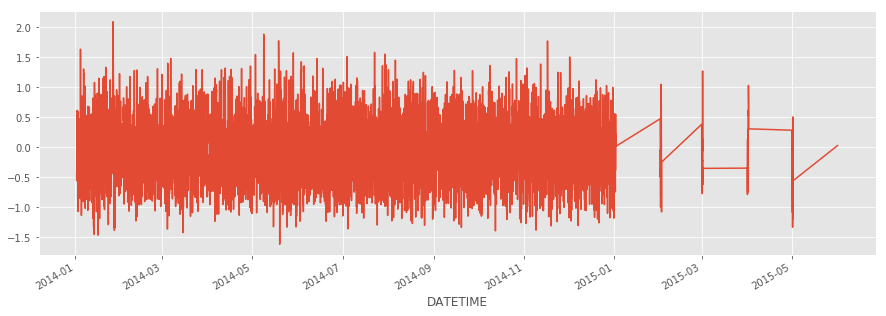

In [31]:
train_1_df = train_1_df.assign(PC15=pca_model[:,14])
train_1_df['PC15'].plot(figsize=(15,5))